In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

print('Train:', df_train.shape)
print('Test:', df_test.shape)

Train: (3000, 23)
Test: (4398, 22)


In [3]:
df_train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

# NaN

## Train

In [4]:
nan_series = df_train.isna().sum()
nan_df = pd.DataFrame({'features': nan_series.index, 'total': nan_series.values})
nan_df['perc'] = nan_df['total'] / df_train.shape[0]
nan_df.sort_values(['perc'], ascending = False)

,features,total,perc
1,belongs_to_collection,2396,0.798667
4,homepage,2054,0.684667
17,tagline,597,0.199000
19,Keywords,276,0.092000
11,production_companies,156,0.052000
12,production_countries,55,0.018333
15,spoken_languages,20,0.006667
21,crew,16,0.005333
20,cast,13,0.004333
8,overview,8,0.002667


In [5]:
drop_cols = ['belongs_to_collection', 'homepage', # many NaNs
             'overview', 'tagline', 'original_title', # NLP
             'poster_path', 'imdb_id'] # unused

df_train.drop(drop_cols, axis = 1, inplace = True)
df_test.drop(drop_cols, axis = 1, inplace = True)

print('Train:', df_train.shape)
print('Test:', df_test.shape)

Train: (3000, 16)
Test: (4398, 15)


In [6]:
nan_series = df_train.isna().sum()
nan_df = pd.DataFrame({'features': nan_series.index, 'total': nan_series.values})
nan_df['perc'] = nan_df['total'] / df_train.shape[0]
nan_df.sort_values(['perc'], ascending = False)

,features,total,perc
12,Keywords,276,0.092000
5,production_companies,156,0.052000
6,production_countries,55,0.018333
9,spoken_languages,20,0.006667
14,crew,16,0.005333
13,cast,13,0.004333
2,genres,7,0.002333
8,runtime,2,0.000667
0,id,0,0.000000
1,budget,0,0.000000


In [7]:
df_train['Keywords'].fillna('[]', inplace = True)
df_train['production_companies'].fillna('[]', inplace = True)
df_train['production_countries'].fillna('[]', inplace = True)
df_train['spoken_languages'].fillna('[]', inplace = True)
df_train['crew'].fillna('[]', inplace = True)
df_train['cast'].fillna('[]', inplace = True)
df_train['genres'].fillna('[]', inplace = True)

df_train['runtime'].fillna(df_train['runtime'].mean().item(), inplace = True)

df_train.isna().sum()

id                      0
budget                  0
genres                  0
original_language       0
popularity              0
production_companies    0
production_countries    0
release_date            0
runtime                 0
spoken_languages        0
status                  0
title                   0
Keywords                0
cast                    0
crew                    0
revenue                 0
dtype: int64

## Test

In [8]:
nan_series = df_test.isna().sum()
nan_df = pd.DataFrame({'features': nan_series.index, 'total': nan_series.values})
nan_df['perc'] = nan_df['total'] / df_test.shape[0]
nan_df.sort_values(['perc'], ascending = False)

,features,total,perc
12,Keywords,393,0.089359
5,production_companies,258,0.058663
6,production_countries,102,0.023192
9,spoken_languages,42,0.009550
14,crew,22,0.005002
2,genres,16,0.003638
13,cast,13,0.002956
8,runtime,4,0.000910
11,title,3,0.000682
10,status,2,0.000455


In [9]:
df_test['Keywords'].fillna('[]', inplace = True)
df_test['production_companies'].fillna('[]', inplace = True)
df_test['production_countries'].fillna('[]', inplace = True)
df_test['spoken_languages'].fillna('[]', inplace = True)
df_test['crew'].fillna('[]', inplace = True)
df_test['cast'].fillna('[]', inplace = True)
df_test['genres'].fillna('[]', inplace = True)

df_test['runtime'].fillna(df_train['runtime'].mean().item(), inplace = True)
df_test['status'].fillna('Released', inplace = True)
df_test['status'].replace('Post Production', 'Released', inplace = True)

df_test.isna().sum()

id                      0
budget                  0
genres                  0
original_language       0
popularity              0
production_companies    0
production_countries    0
release_date            1
runtime                 0
spoken_languages        0
status                  0
title                   3
Keywords                0
cast                    0
crew                    0
dtype: int64

In [10]:
df_test[df_test['release_date'].isna()]

,id,budget,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,Keywords,cast,crew
828,3829,0,"[{'id': 18, 'name': 'Drama'}]",en,0.009057,[],[],NaN,90.0,[],Released,"Jails, Hospitals & Hip-Hop",[],[],[]


In [11]:
df_test['release_date'].fillna('03/20/01', inplace = True)
df_test.loc[828]

id                                               3829
budget                                              0
genres                  [{'id': 18, 'name': 'Drama'}]
original_language                                  en
popularity                                   0.009057
production_companies                               []
production_countries                               []
release_date                                 03/20/01
runtime                                            90
spoken_languages                                   []
status                                       Released
title                      Jails, Hospitals & Hip-Hop
Keywords                                           []
cast                                               []
crew                                               []
Name: 828, dtype: object

## Merge sets

In [12]:
train_labels = df_train.pop('revenue')
df_full = pd.concat([df_train, df_test], keys = ['train', 'test'])
df_full.shape

(7398, 15)

In [13]:
df_full.head()

id    budget                                             genres  \
train 0   1  14000000                     [{'id': 35, 'name': 'Comedy'}]   
      1   2  40000000  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
      2   3   3300000                      [{'id': 18, 'name': 'Drama'}]   
      3   4   1200000  [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...   
      4   5         0  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   

        original_language  popularity  \
train 0                en    6.575393   
      1                en    8.248895   
      2                en   64.299990   
      3                hi    3.174936   
      4                ko    1.148070   

                                      production_companies  \
train 0  [{'name': 'Paramount Pictures', 'id': 4}, {'na...   
      1        [{'name': 'Walt Disney Pictures', 'id': 2}]   
      2  [{'name': 'Bold Films', 'id': 2266}, {'name': ...   
      3                                                 []   
      4                                                 []   

                                      production_countries release_date  \
train 0  [{'iso_3166_1': 'US', 'name': 'United States o...      2/20/15   
      1  [{'iso_3166_1': 'US', 'name': 'United States o...       8/6/04   
      2  [{'iso_3166_1': 'US', 'name': 'United States o...     10/10/14   
      3            [{'iso_3166_1': 'IN', 'name': 'India'}]       3/9/12   
      4      [{'iso_3166_1': 'KR', 'name': 'South Korea'}]       2/5/09   

         runtime                                   spoken_languages    status  \
train 0     93.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
      1    113.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
      2    105.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
      3    122.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
      4    118.0           [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]  Released   

                                            title  \
train 0                    Hot Tub Time Machine 2   
      1  The Princess Diaries 2: Royal Engagement   
      2                                  Whiplash   
      3                                   Kahaani   
      4                                Marine Boy   

                                                  Keywords  \
train 0  [{'id': 4379, 'name': 'time travel'}, {'id': 9...   
      1  [{'id': 2505, 'name': 'coronation'}, {'id': 42...   
      2  [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...   
      3  [{'id': 10092, 'name': 'mystery'}, {'id': 1054...   
      4                                                 []   

                                                      cast  \
train 0  [{'cast_id': 4, 'character': 'Lou', 'credit_id...   
      1  [{'cast_id': 1, 'character': 'Mia Thermopolis'...   
      2  [{'cast_id': 5, 'character': 'Andrew Neimann',...   
      3  [{'cast_id': 1, 'character': 'Vidya Bagchi', '...   
      4  [{'cast_id': 3, 'character': 'Chun-soo', 'cred...   

                                                      crew  
train 0  [{'credit_id': '59ac067c92514107af02c8c8', 'de...  
      1  [{'credit_id': '52fe43fe9251416c7502563d', 'de...  
      2  [{'credit_id': '54d5356ec3a3683ba0000039', 'de...  
      3  [{'credit_id': '52fe48779251416c9108d6eb', 'de...  
      4  [{'credit_id': '52fe464b9251416c75073b43', 'de...

# Categorical Features

In [14]:
# df_features = df_full[['id', 'budget', 'original_language', 'popularity', 'runtime', 'release_date', 'status']]
# df_features.head()

## Label Encoder

In [15]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# df_features['original_language'] = le.fit_transform(df_features['original_language'])
# df_features['status'] = le.fit_transform(df_features['status'])

## Time Features

In [16]:
# df_features['release_date'] = pd.to_datetime(df_features['release_date'])

# df_features['release_year'] = df_features['release_date'].dt.year

# df_features['release_month'] = df_features['release_date'].dt.month
# df_features['release_quarter'] = df_features['release_date'].dt.quarter

# df_features.drop(['release_date'], axis = 1, inplace = True)

# df_features.head()

## Production Companies

In [17]:
from ast import literal_eval

def extract_dict(dict_str):
    dict_res = dict_str.replace('[', '').replace(']', '')
    dict_res = dict_res.replace('}, {', '};{')
    dict_res = dict_res.split(';')
    return dict_res

def get_cat_values(feature, value_name):
    value_list = set()
    for obs in df_full[feature]:
        if obs == '[]':
            continue
        item_dict = extract_dict(obs)
        for item in item_dict:
            value_list.add(literal_eval(item)[value_name].lower())
    print("Feature: {} - Number of values: {}".format(feature, len(value_list)))
    return value_list

def get_value_frenquency(feature, value_name, value_list):
    df_counts = pd.DataFrame(index = value_list)
    df_counts['counts'] = 0

    for obs in df_full[feature]:
        if obs == '[]':
            continue
        item_dict = extract_dict(obs)
        for item in item_dict:
            item_id = literal_eval(item)[value_name].lower()
            df_counts['counts'].loc[item_id] += 1
            
    return df_counts

def add_features(prefix, name_list):
    for name in name_list:
        col_name = prefix + '_' + name
        df_features[col_name] = 0

In [18]:
# production_companies = get_cat_values('production_companies', 'name')

In [19]:
# company_counts = pd.DataFrame(index = production_companies)
# company_counts['counts'] = 0

# for item in df_full['production_companies']:
#     if item == '[]':
#         continue
#     companies_dict = extract_dict(item)
#     for company in companies_dict:
#         company_id = literal_eval(company)['name'].lower()
#         company_counts['counts'].loc[company_id] += 1
        
# company_counts.sort_values('counts', ascending = False).head(10)

In [20]:
# company_counts.sort_values('counts', ascending = False).to_csv('company_counts.csv')

In [21]:
# companies = pd.read_csv('company_counts_cleaned.csv')
# companies = companies[companies['counts'] > 50]
# companies = list(companies['Unnamed: 0'])
# print(len(companies))
# companies

In [22]:
# add_features('pc', companies)
    
# print(df_features.shape)
# df_features.head()

In [23]:
# from time import time

# t = time()
# count = 0
# for index, row in df_full.iterrows():
#     count += 1
#     if count % 100 == 0:
#         print(count, end = ' ')
#     for comp in companies:
#         col_name = 'pc_' + comp
#         if comp in row['production_companies'].lower():
#             df_features[col_name].loc[index] = 1
            
# print()
# t = time() - t
# print('Time elapsed: {}m{}s'.format(int(t // 60), int(t % 60)))
# df_features.head()

In [24]:
# df_features['pc_century_fox'] = df_features['pc_20th century fox'] | df_features['pc_21st century'] | df_features['pc_twentieth century fox']
# df_features['pc_lions_gate'] = df_features['pc_lions gate'] | df_features['pc_lionsgate']
# df_features['pc_dc'] = df_features['pc_dc comics'] | df_features['pc_dc entertainment']

# df_features.drop(['pc_20th century fox', 'pc_21st century', 'pc_twentieth century fox',
#                   'pc_lions gate', 'pc_lionsgate', 'pc_dc comics', 'pc_dc entertainment'],
#                   axis = 1, inplace = True)

# df_features.shape

## Production Countries

In [25]:
# df_full['production_countries'].loc['train', 0]

In [26]:
# production_countries = get_cat_values('production_countries', 'iso_3166_1')

In [27]:
# production_countries_counts = pd.DataFrame(index = production_countries)
# production_countries_counts['counts'] = 0

# for item in df_full['production_countries']:
#     if item == '[]':
#         continue
#     countries_dict = extract_dict(item)
#     for country in countries_dict:
#         country_id = literal_eval(country)['iso_3166_1']
#         production_countries_counts['counts'].loc[country_id] += 1
        
# production_countries_counts.sort_values('counts', ascending = False).head(10)

In [28]:
# production_countries_counts.sort_values('counts', ascending = False).to_csv('production_countries_counts.csv')

In [29]:
# production_countries_counts = pd.read_csv('production_countries_counts.csv')
# production_countries_counts = production_countries_counts[production_countries_counts['counts'] >= 20]
# top_production_countries = list(production_countries_counts['Unnamed: 0'])
# top_production_countries

In [30]:
# add_features('pcn', top_production_countries)
# print(df_features.shape)
# df_features.head()

In [31]:
# t = time()
# count = 0

# for index, row in df_full.iterrows():
#     count += 1
#     if count % 100 == 0:
#         print(count, end = ' ')
#     if row['production_countries'] == '[]':
#         continue
#     countries_dict = extract_dict(row['production_countries'])
#     for country in countries_dict:
#         country_id = literal_eval(country)['iso_3166_1']
#         if country_id in top_production_countries:
#             col_name = 'pcn_' + country_id
#             df_features[col_name].loc[index] = 1
            
# print()
# t = time() - t
# print('Time elapsed: {}m{}s'.format(int(t // 60), int(t % 60)))
# df_features.head()

## Genres

In [32]:
# genres = get_cat_values('genres', 'name')
# genres

In [33]:
# add_features('genre', genres)
# df_features.head()

In [34]:
# from time import time

# t = time()
# count = 0
# for index, row in df_full.iterrows():
#     count += 1
#     if count % 100 == 0:
#         print(count, end = ' ')
#     for genre in genres:
#         col_name = 'genre_' + genre
#         if genre in row['genres'].lower():
#             df_features[col_name].loc[index] = 1
            
# print()
# t = time() - t
# print('Time elapsed: {}m{}s'.format(int(t // 60), int(t % 60)))
# df_features.head()

## Spoken Language

In [35]:
# df_full['spoken_languages'].loc['train', 0]

In [36]:
# spoken_languages = get_cat_values('spoken_languages', 'iso_639_1')
# spoken_languages_counts = get_value_frenquency('spoken_languages', 'iso_639_1', spoken_languages)
# spoken_languages_counts.head(20)

In [37]:
# spoken_languages_counts.sort_values('counts', ascending = False).to_csv('spoken_languages.csv')

In [38]:
# spoken_languages_counts = pd.read_csv('spoken_languages.csv')
# spoken_languages_counts = spoken_languages_counts[spoken_languages_counts['counts'] >= 50]
# spoken_languages_counts = list(spoken_languages_counts['Unnamed: 0'])
# spoken_languages_counts

In [39]:
# add_features('spl', spoken_languages_counts)
# print(df_features.shape)
# df_features.head()

In [40]:
# t = time()
# count = 0

# for index, row in df_full.iterrows():
#     count += 1
#     if count % 100 == 0:
#         print(count, end = ' ')
#     if row['spoken_languages'] == '[]':
#         continue
#     spoken_languages_dict = extract_dict(row['spoken_languages'])
#     for lang in spoken_languages_dict:
#         lang_id = literal_eval(lang)['iso_639_1']
#         if lang_id in spoken_languages_counts:
#             col_name = 'spl_' + lang_id
#             df_features[col_name].loc[index] = 1
            
# print()
# t = time() - t
# print('Time elapsed: {}m{}s'.format(int(t // 60), int(t % 60)))
# df_features.head()

# Crew

In [41]:
# df_features['crew_size'] = df_full['crew'].apply(lambda x: x.count('{'))
# df_features['crew_size'].head()

In [42]:
# crew_jobs = get_cat_values('crew', 'job')
# crew_jobs_counts = get_value_frenquency('crew', 'job', crew_jobs)
# crew_jobs_counts.head()

In [43]:
# crew_jobs_counts.sort_values('counts', ascending = False).to_csv('crew_jobs_counts.csv')

In [44]:
# crew_jobs_counts = pd.read_csv('crew_jobs_counts.csv')
# crew_jobs_counts = crew_jobs_counts[crew_jobs_counts['counts'] > 1000]
# top_crew_jobs = list(crew_jobs_counts['Unnamed: 0'])
# top_crew_jobs

In [45]:
# add_features('crew_job', top_crew_jobs)
# print(df_features.shape)
# df_features.head()

In [46]:
# from time import time

# t = time()
# count = 0

# for index, row in df_full.iterrows():
#     count += 1
#     if count % 100 == 0:
#         print(count, end = ' ')
#     if row['crew'] == '[]':
#         continue
#     values_dict = extract_dict(row['crew'])
#     for value in values_dict:
#         value_id = literal_eval(value)['job'].lower()
#         if value_id in top_crew_jobs:
#             col_name = 'crew_job_' + value_id
#             df_features[col_name].loc[index] += 1
            
# print()
# t = time() - t
# print('Time elapsed: {}m{}s'.format(int(t // 60), int(t % 60)))
# df_features.head()

# Day of week

In [47]:
# release_date = pd.to_datetime(df_full['release_date'])
# df_features['release_dayofweek'] = release_date.dt.dayofweek
# df_features['release_dayofweek'].head()

In [48]:
# df_features.head()

# Cast size

In [49]:
# df_features['cast_size'] = df_full['cast'].apply(lambda x: x.count('{'))
# df_features.head()

# Numerical

## Replace zeros

In [148]:
# budget_mean = df_features[df_features['budget'] != 0]['budget'].mean()
# df_features['budget'] = df_features['budget'].apply(lambda x: budget_mean if x == 0 else x)
# df_features.head()

In [149]:
# runtime_mean = df_features[(df_features['runtime'] != 0) & (df_features['runtime'] < 1000)]['runtime'].mean()
# df_features['runtime'] = df_features['runtime'].apply(lambda x: runtime_mean if x == 0 else x)
# df_features['runtime'] = df_features['runtime'].apply(lambda x: runtime_mean if x > 1000 else x)
# print(runtime_mean)
# df_features.head()

## Budget over Runtime

In [150]:
# df_features['budget_over_runtime'] = df_features['budget'] / df_features['runtime']
# df_features.head()

## Scaling

In [151]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

In [152]:
# df_features['budget'] = scaler.fit_transform(df_features['budget'].values.reshape(-1, 1))
# df_features['budget_over_runtime'] = scaler.fit_transform(df_features['budget_over_runtime'].values.reshape(-1, 1))
# df_features.head()

In [153]:
# df_features['popularity'] = scaler.fit_transform(df_features['popularity'].values.reshape(-1, 1))
# df_features.head()

# Save Features

In [122]:
df_features = pd.read_csv('df_features.csv')
df_features.set_index(['Unnamed: 0', 'Unnamed: 1'], inplace = True)
df_features.head()

id    budget  original_language  popularity  runtime  \
Unnamed: 0 Unnamed: 1                                                         
train      0            1  14000000                 10    6.575393     93.0   
           1            2  40000000                 10    8.248895    113.0   
           2            3   3300000                 10   64.299990    105.0   
           3            4   1200000                 16    3.174936    122.0   
           4            5         0                 24    1.148070    118.0   

                       status  release_year  release_month  release_quarter  \
Unnamed: 0 Unnamed: 1                                                         
train      0                0          2015              2                1   
           1                0          2004              8                3   
           2                0          2014             10                4   
           3                0          2012              3                1   
           4                0          2009              2                1   

                       pc_warner  pc_universal  pc_paramount  \
Unnamed: 0 Unnamed: 1                                          
train      0                   0             0             1   
           1                   0             0             0   
           2                   0             0             0   
           3                   0             0             0   
           4                   0             0             0   

                       pc_columbia pictures  pc_disney  \
Unnamed: 0 Unnamed: 1                                    
train      0                              0          0   
           1                              0          1   
           2                              0          0   
           3                              0          0   
           4                              0          0   

                       pc_metro-goldwyn-mayer  pc_new line  pc_canal  \
Unnamed: 0 Unnamed: 1                                                  
train      0                                1            0         0   
           1                                0            0         0   
           2                                0            0         0   
           3                                0            0         0   
           4                                0            0         0   

                       pc_touchstone pictures  pc_fox  pc_dreamworks  \
Unnamed: 0 Unnamed: 1                                                  
train      0                                0       0              0   
           1                                0       0              0   
           2                                0       0              0   
           3                                0       0              0   
           4                                0       0              0   

                       pc_tristar  pc_miramax  pc_relativity media  \
Unnamed: 0 Unnamed: 1                                                
train      0                    0           0                    0   
           1                    0           0                    0   
           2                    0           0                    0   
           3                    0           0                    0   
           4                    0           0                    0   

                       pc_united artists  pc_dune  pc_france  \
Unnamed: 0 Unnamed: 1                                          
train      0                           1        0          0   
           1                           0        0          0   
           2                           0        0          0   
           3                           0        0          0   
           4                           0        0          0   

                       pc_village roadshow  pc_regency  pc_sony  pc_amblin  \
Unnamed: 0 Unnamed: 1          

In [147]:
# df_features.to_csv('df_features.csv')

# Target

In [132]:
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm

def plot_norm(col_name):
    sns.distplot(df_full[col_name], fit = norm)
    fig = plt.figure()
    
def log_transform(col_name, extract_zero = False):
    plot_norm(col_name)
    
    if extract_zero:
        df_full['temp'] = 0
        df_full.loc[df_full[col_name] > 0, 'temp'] = 1
        df_full.loc[df_full['temp'] == 1, col_name] = np.log(df_full[col_name])
        df_full.drop(['temp'], axis = 1, inplace = True)
    else:
        df_full[col_name] = np.log(df_full[col_name])
        
    plot_norm(col_name)

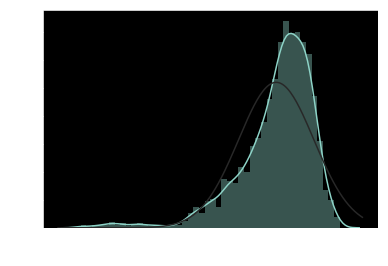

In [133]:
train_labels_log = np.log(train_labels)
sns.distplot(train_labels_log, fit = norm)

# Model

In [134]:
from sklearn.model_selection import train_test_split

train_set = df_features.loc['train']
train_set.drop(['id'], axis = 1, inplace = True)
test_set = df_features.loc['test']

# x_train, x_val, y_train, y_val = train_test_split(train_set, train_labels_log, test_size = 0.2, random_state = 1)

# print('Train:', x_train.shape, y_train.shape)
# print('Val:', x_val.shape, y_val.shape)

In [135]:
test_id = test_set.pop('id')
test_id.head()

Unnamed: 1
0    3001
1    3002
2    3003
3    3004
4    3005
Name: id, dtype: int64

In [164]:
import lightgbm as lgb
import gc

# train_ds = lgb.Dataset(x_train, label = y_train)
# val_ds = lgb.Dataset(x_val, label = y_val)

# watchlist = [train_ds, val_ds]

params = {
    'learning_rate': 0.01, 
    'boosting': 'gbdt', 
    'objective': 'regression', 
    'max_depth': -1,
    'seed': 191, 
    'num_leaves': 31,
    'metric': 'rmse',
    'nthreads': 8,
    'lambda_l1': 0.005,
    'verbose': -1
}

def rmsle(y_true, y_pred):
    assert len(y_true) == len(y_pred)
    y_true = np.exp(y_true)
    y_pred = np.exp(y_pred)
    return np.sqrt(np.mean(np.power(np.log1p(y_true + 1) - np.log1p(y_pred + 1), 2)))

gc.collect()

29

In [161]:
from sklearn.model_selection import KFold

n_folds = 5
folds = KFold(n_splits = n_folds, shuffle = True, random_state = 191)
test_pred = pd.DataFrame()

for i, (train_index, val_index) in enumerate(folds.split(train_set)):
    print('Fold', i + 1)
    
    x_train = train_set.loc[train_index, :]
    y_train = train_labels_log[train_index]
    
    x_val = train_set.loc[val_index, :]
    y_val = train_labels_log[val_index]
    
    train_ds = lgb.Dataset(x_train, label = y_train)
    val_ds = lgb.Dataset(x_val, label = y_val)
    watchlist = [train_ds, val_ds]
    
    lgb_model = lgb.train(params, train_ds, 1000,
                      valid_sets = watchlist, verbose_eval = 100)
    
    test_pred['Fold {}'.format(i + 1)] = lgb_model.predict(test_set)
    
    print()

Fold 1
[100]	training's rmse: 2.45606	valid_1's rmse: 2.3745
[200]	training's rmse: 2.09708	valid_1's rmse: 2.10068
[300]	training's rmse: 1.85932	valid_1's rmse: 1.96175
[400]	training's rmse: 1.6944	valid_1's rmse: 1.89365
[500]	training's rmse: 1.568	valid_1's rmse: 1.86206
[600]	training's rmse: 1.46448	valid_1's rmse: 1.83839
[700]	training's rmse: 1.371	valid_1's rmse: 1.82299
[800]	training's rmse: 1.29149	valid_1's rmse: 1.81276
[900]	training's rmse: 1.22043	valid_1's rmse: 1.80832
[1000]	training's rmse: 1.15503	valid_1's rmse: 1.8059

Fold 2
[100]	training's rmse: 2.41473	valid_1's rmse: 2.5788
[200]	training's rmse: 2.04414	valid_1's rmse: 2.38159
[300]	training's rmse: 1.80244	valid_1's rmse: 2.27776
[400]	training's rmse: 1.63287	valid_1's rmse: 2.23121
[500]	training's rmse: 1.50734	valid_1's rmse: 2.20988
[600]	training's rmse: 1.40333	valid_1's rmse: 2.20118
[700]	training's rmse: 1.31155	valid_1's rmse: 2.19883
[800]	training's rmse: 1.23496	valid_1's rmse: 2.19791
[9

In [65]:
# lgb_model = lgb.train(params, train_ds, 1000,
#                       valid_sets = watchlist, verbose_eval = 20)

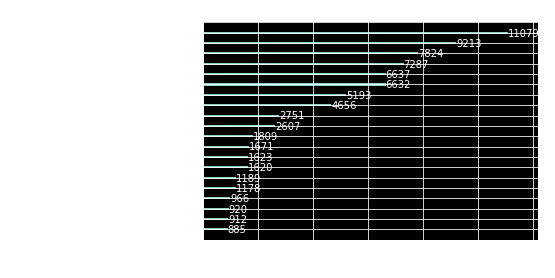

In [162]:
lgb.plot_importance(lgb_model, max_num_features = 20)

In [163]:
val_preds = lgb_model.predict(x_val)
rmsle(val_preds, y_val)

2.113326762123755

In [142]:
test_pred.head()

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5
0,16.614276,16.751634,15.417274,16.637253,16.257252
1,14.468930,14.603315,14.559934,14.431379,13.289608
2,16.162669,16.641128,16.579885,16.343326,16.876710
3,15.422335,15.214527,15.792505,15.885008,15.142651
4,14.089967,13.709024,13.670488,12.104736,14.065438


In [143]:
test_pred['avg'] = test_pred.mean(axis = 1)
test_pred.head()

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,avg
0,16.614276,16.751634,15.417274,16.637253,16.257252,16.335537
1,14.468930,14.603315,14.559934,14.431379,13.289608,14.270633
2,16.162669,16.641128,16.579885,16.343326,16.876710,16.520743
3,15.422335,15.214527,15.792505,15.885008,15.142651,15.491405
4,14.089967,13.709024,13.670488,12.104736,14.065438,13.527931


In [144]:
preds = test_pred['avg']
preds = np.exp(preds)
print(preds.shape)

(4398,)


In [145]:
submission = pd.DataFrame({'id': test_id, 'revenue': preds})
submission.head()

,id,revenue
Unnamed: 1,,
0,3001,1.242893e+07
1,3002,1.576367e+06
2,3003,1.495780e+07
3,3004,5.343574e+06
4,3005,7.500765e+05


In [146]:
submission.to_csv('submission.csv', index = False)